# Chapter 3 Factor Investing and Asset Pricing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [11, 5.5]

---

## Load Data

Source: [link](https://github.com/shokru/mlfactor.github.io/tree/master/material)

In [2]:
data_ml = pd.read_pickle('./data/data_ml.pkl')
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283380 entries, 0 to 283379
Data columns (total 99 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   stock_id                        283380 non-null  int64         
 1   date                            283380 non-null  datetime64[ns]
 2   Advt_12M_Usd                    283380 non-null  float64       
 3   Advt_3M_Usd                     283380 non-null  float64       
 4   Advt_6M_Usd                     283380 non-null  float64       
 5   Asset_Turnover                  283380 non-null  float64       
 6   Bb_Yld                          283380 non-null  float64       
 7   Bv                              283380 non-null  float64       
 8   Capex_Ps_Cf                     283380 non-null  float64       
 9   Capex_Sales                     283380 non-null  float64       
 10  Cash_Div_Cf                     283380 non-null  float64

---

## 3.2 Detecting Anomalies

### 3.2.2 Simple Portfolio Sorts

#### Size Anomaly

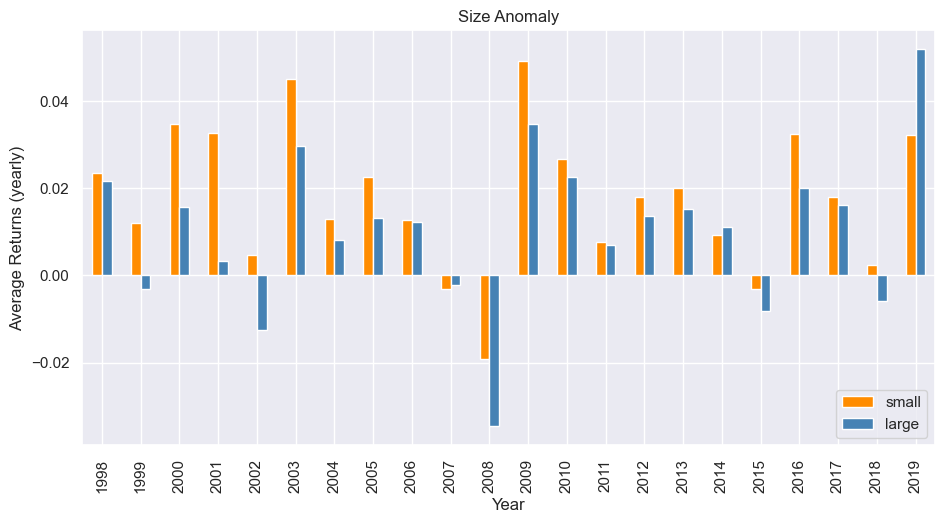

In [3]:
(
    data_ml.
    assign(large = lambda df: df.Mkt_Cap_12M_Usd > df.Mkt_Cap_12M_Usd.median()).
    assign(year = lambda df: df.date.dt.year).
    groupby(by=['year', 'large'])[['R1M_Usd']].
    mean().reset_index().
    replace({'large': {True: 'large', False: 'small'}}).
    pivot(index='year', columns='large', values='R1M_Usd')[['small', 'large']].
    plot.bar(color=['darkorange', 'steelblue'])
)
plt.title('Size Anomaly')
plt.xlabel('Year')
plt.ylabel('Average Returns (yearly)')
plt.legend(loc='lower right')
pass

### 3.2.3 Factors

In [4]:
df_ff_5f_m = pd.read_pickle('./data/ff_5f_m.pkl')
df_ff_5f_m.head()

,MKT_RF,SMB,HML,RMW,CMA,RF
1963-07,-0.0039,-0.0047,-0.0083,0.0066,-0.0115,0.0027
1963-08,0.0507,-0.0079,0.0167,0.0040,-0.0040,0.0025
1963-09,-0.0157,-0.0048,0.0018,-0.0076,0.0024,0.0027
1963-10,0.0253,-0.0129,-0.0010,0.0275,-0.0224,0.0029
1963-11,-0.0085,-0.0084,0.0171,-0.0045,0.0222,0.0027


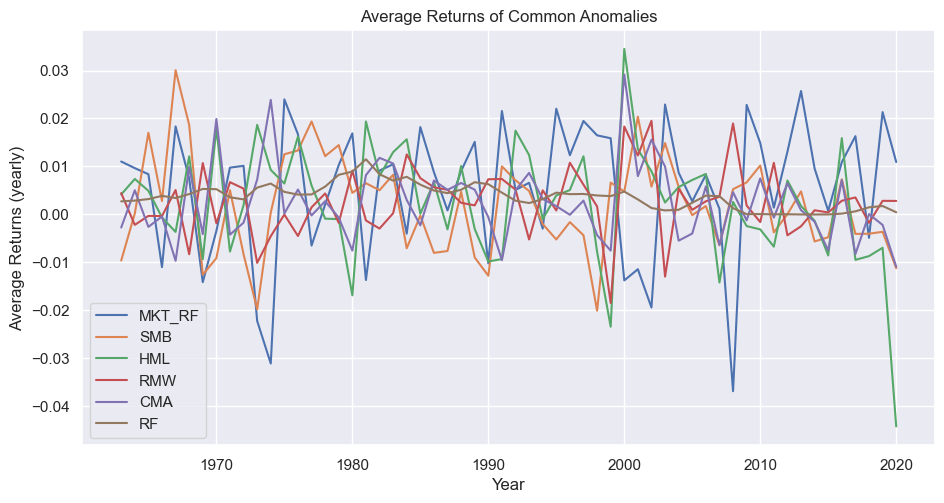

In [5]:
(
    df_ff_5f_m.
    assign(year = lambda df: df.index.year).
    groupby(by='year').mean().
    plot()
)
plt.title('Average Returns of Common Anomalies')
plt.xlabel('Year')
plt.ylabel('Average Returns (yearly)')
pass

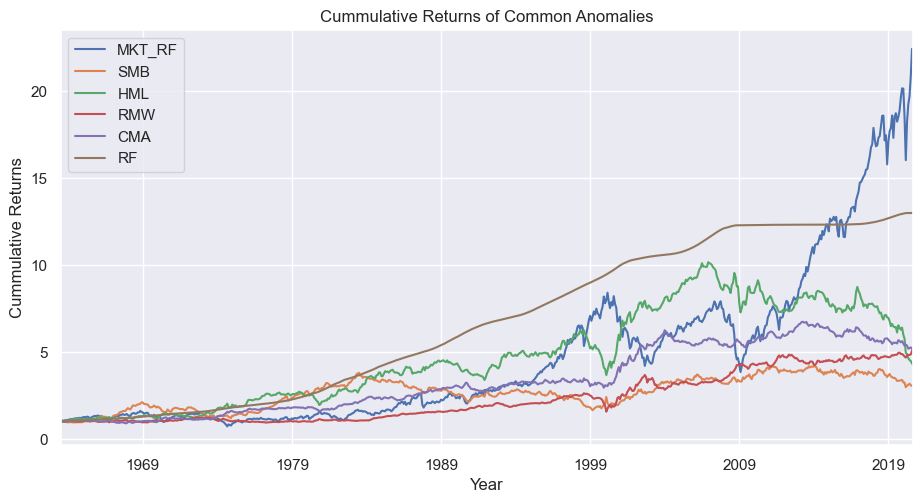

In [6]:
(1 + df_ff_5f_m).cumprod().plot()
plt.title('Cummulative Returns of Common Anomalies')
plt.xlabel('Year')
plt.ylabel('Cummulative Returns')
pass

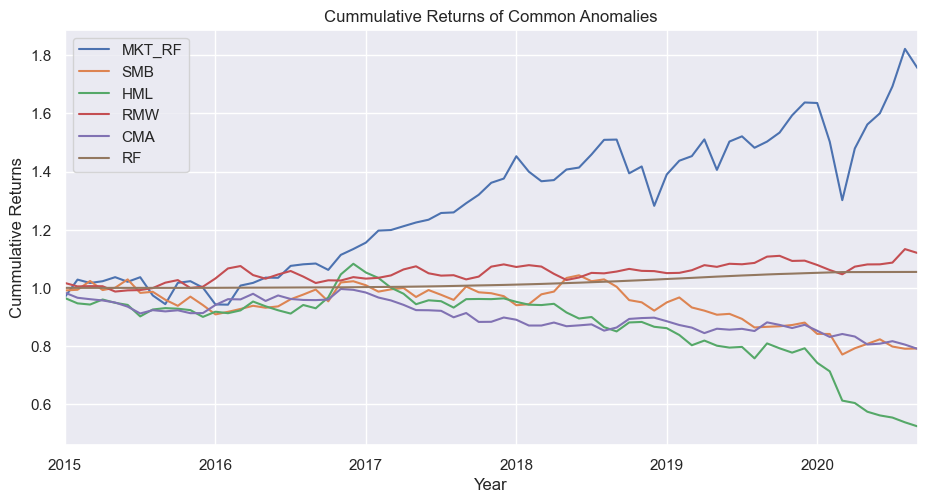

In [7]:
(1 + df_ff_5f_m['2015':]).cumprod().plot()
plt.title('Cummulative Returns of Common Anomalies')
plt.xlabel('Year')
plt.ylabel('Cummulative Returns')
pass